# Introduction to Word Embeddings

## Word Representation
- So far, we have been using a **one-hot** vector based on a vocabulary dictionary to represent a word.
    - We denote a word represented by a one-hot vector as $O_{index}$.
- However, the big disadvantage is that the inner product between any two different one-hot vectors will be 0. 
    - As a result, it is usually hard to train models to learn the connections between two words that are represented by one-hot vectors.
    
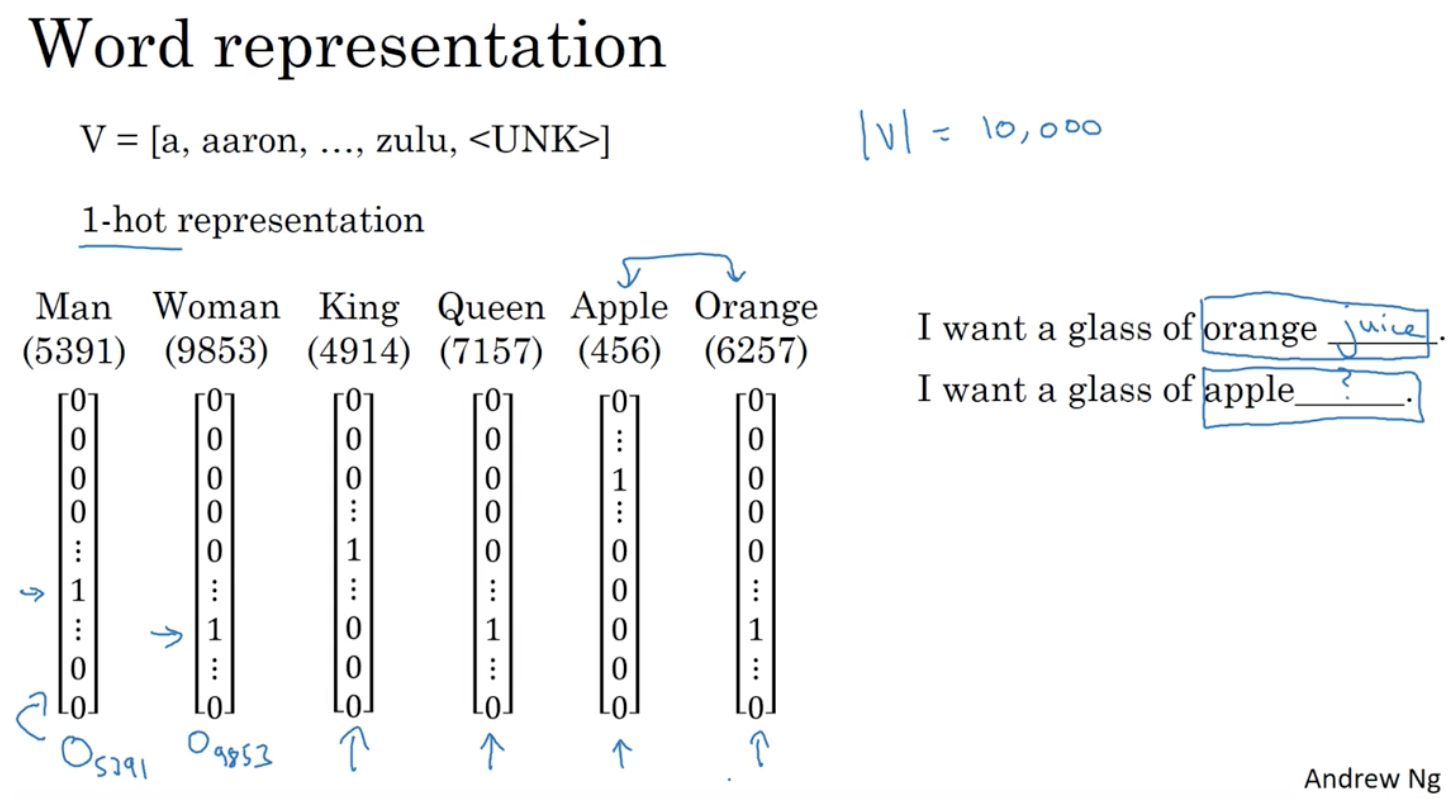

- An alternative is to use **featurized representations**.
    - In this method, we define a set of quantifiable features that describe the characteristics of each word.
    - We denote each feature vector for a word as $e_{index}$.
    
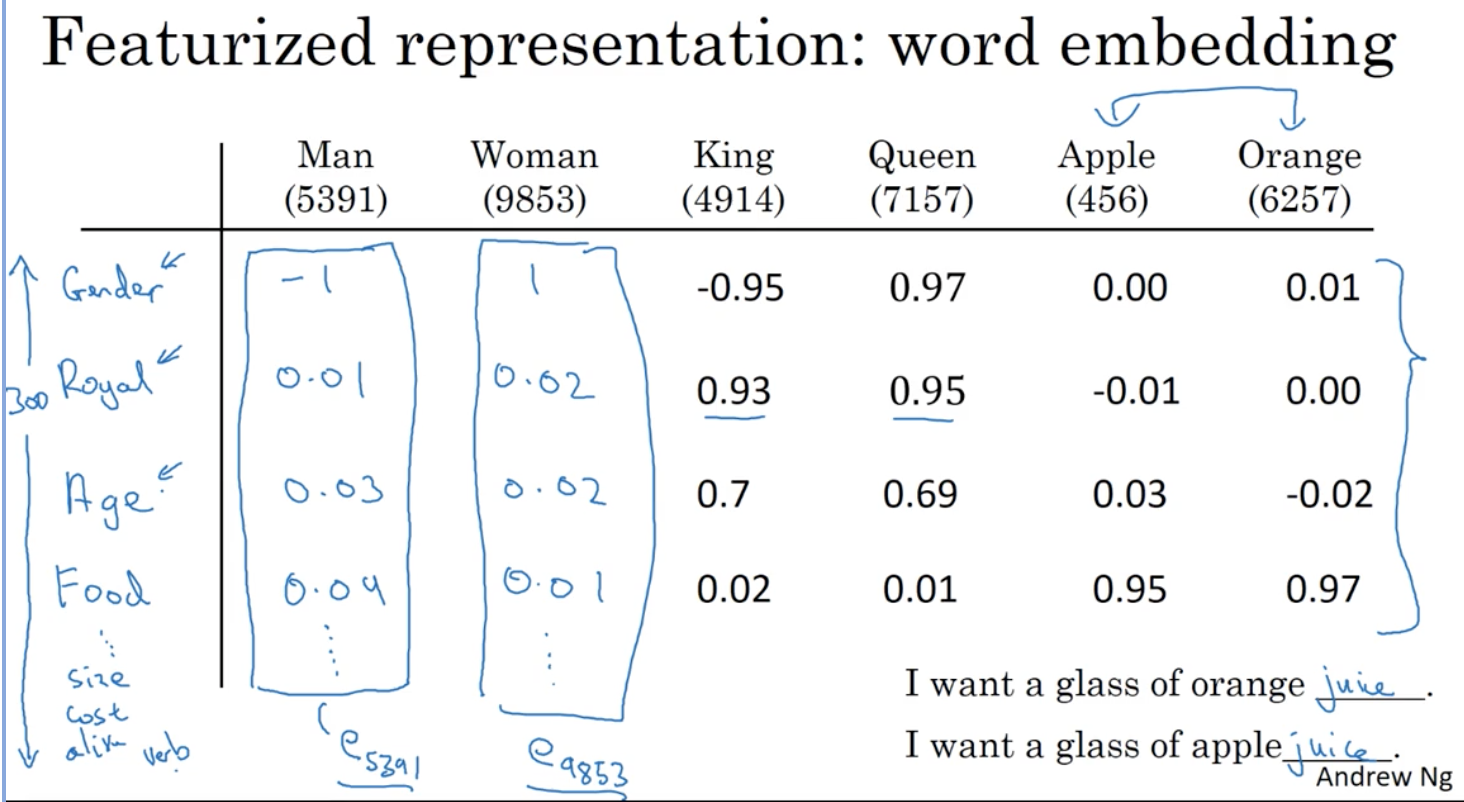

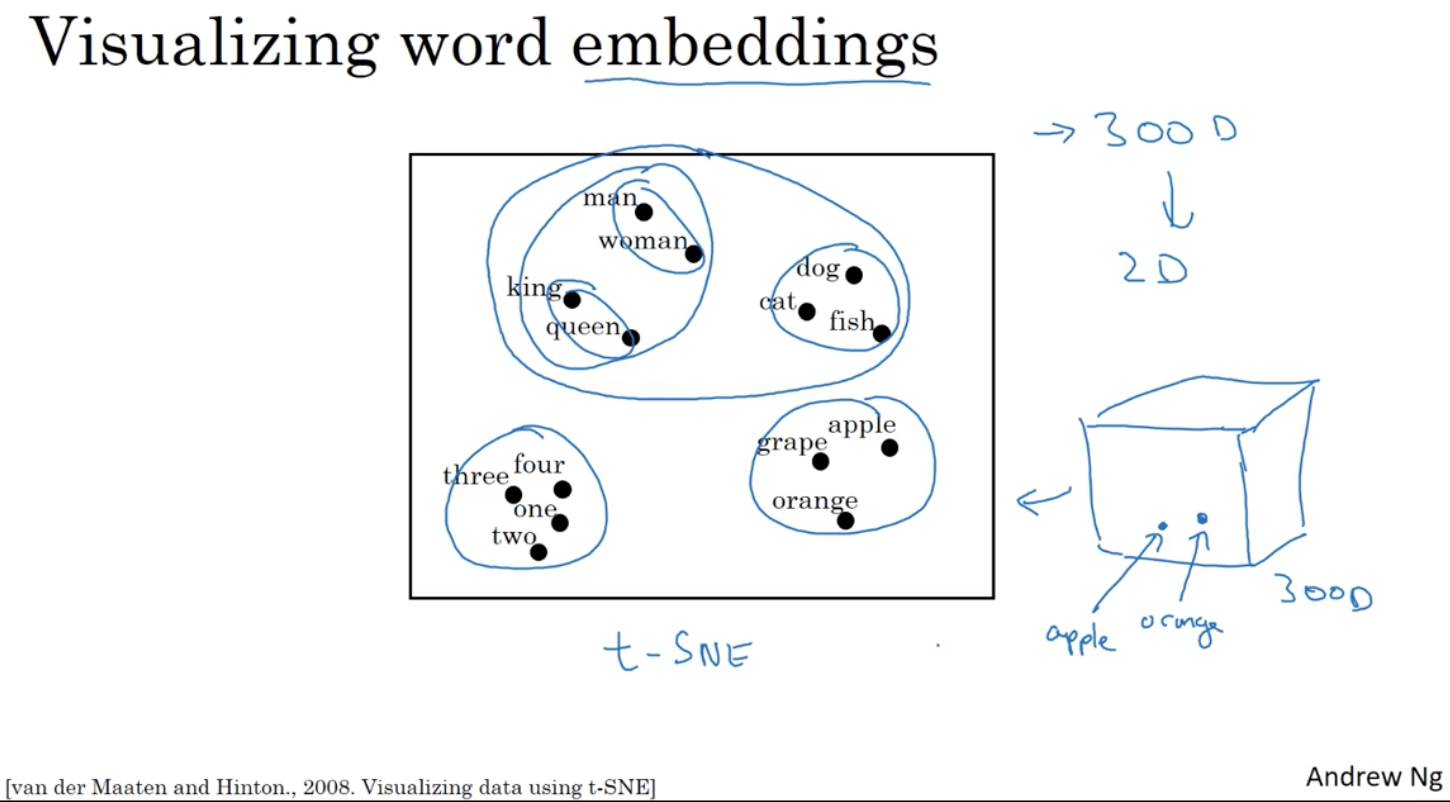

## Using Word Embeddings

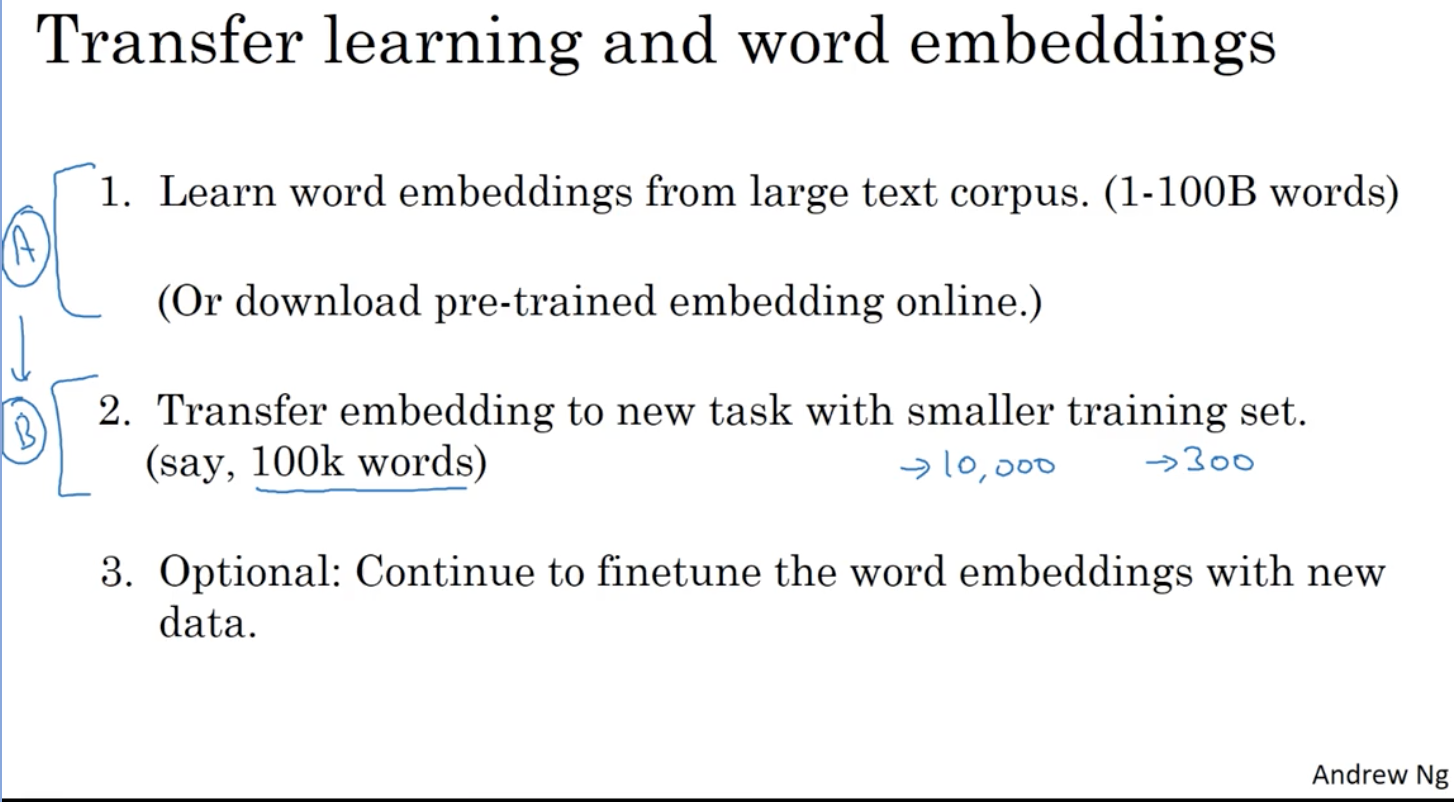

## Properties of Word Embeddings
- Using word embeddings, we represent each word using a vector of features.
- In this way, we can build **analogy reasonings** between two pairs of words by studying the vector difference of each pair.

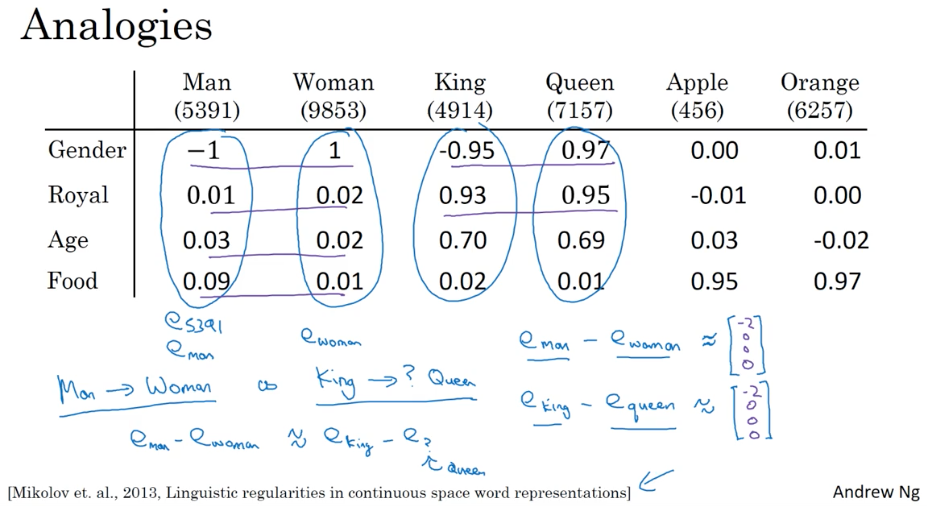

- More formally, given the first pair of words "man" and "woman", we want to find a word $w$ that can form an analogy with "king".
    - i.e. We need to find word $w$ s.t. $argmax_{w} sim(e_{w}, e_{king} - e_{man} + e_{woman})$
    
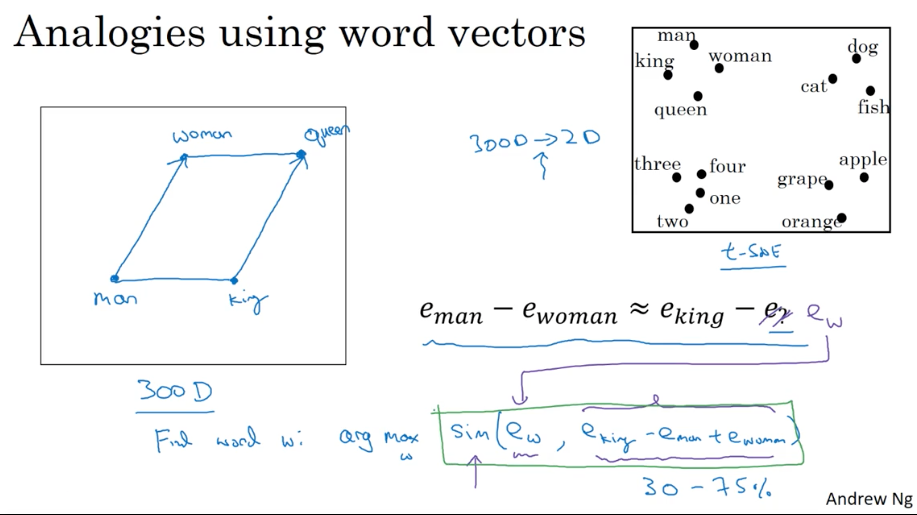

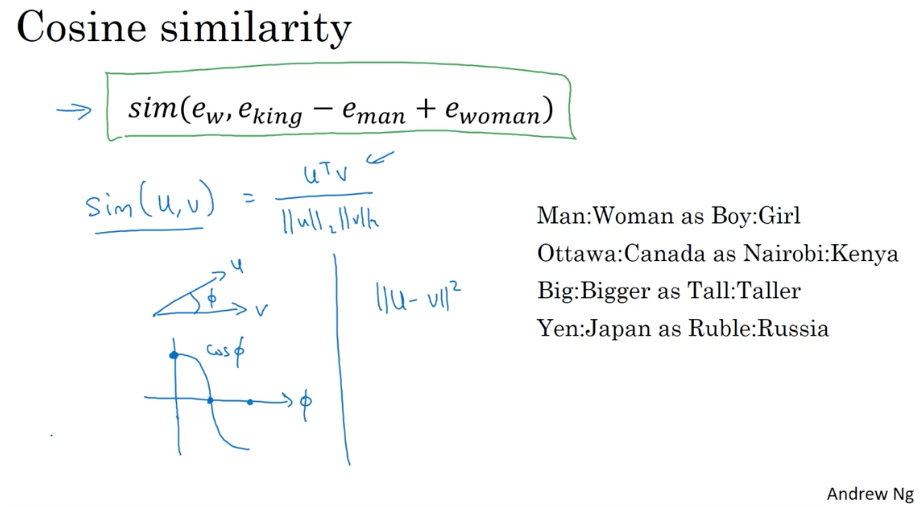

## Embedding Matrix
- Define the **embedding matrix** $E$ as below, then for any word $w$, we have $E o_{w} = e_{w}$. 
    - $o_{w}$: the one-hot vector of the word $w$
    - $e_{w}$: the featurized vector of the word $w$
- Our next step is then to train the embedding matrix $E$.
    - A side note is that because $o_{w}$ is a one-hot vector with most elements being 0, it's actually very inefficient to really conduct matrix multiplication as in the formula above.
    - $E o_{w}$ is essentially just picking a column out of $E$, so we can instead use specialized functions (e.g. `Embedding` from Keras) to avoid matrix multiplication.
    
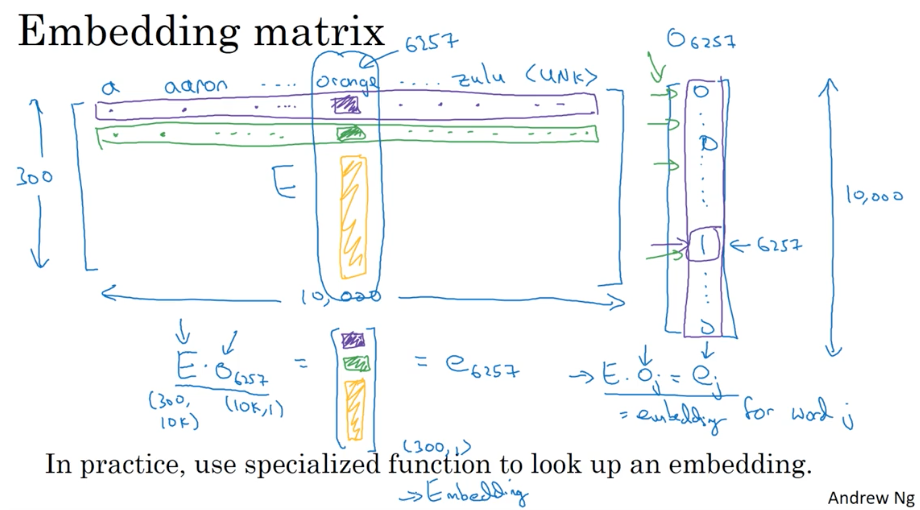

# Learning Word Embeddings: Word2vec & GloVe

## Learning Word Embeddings
- Assume we want to build a NN to predict the next word in a sentence.
- Steps:
    - For each word in the sentence, create a one-hot vector $o_{w}$ using the vocabulary dictionary
    - Use the embedding matrix $E$ to get featurized vector for each word $e_{w} = E o_{w}$
        - Note that the same $E$ is used to embed all words
    - Feed into all $e_{w}$ into a NN and output from a softmax activation function.
    
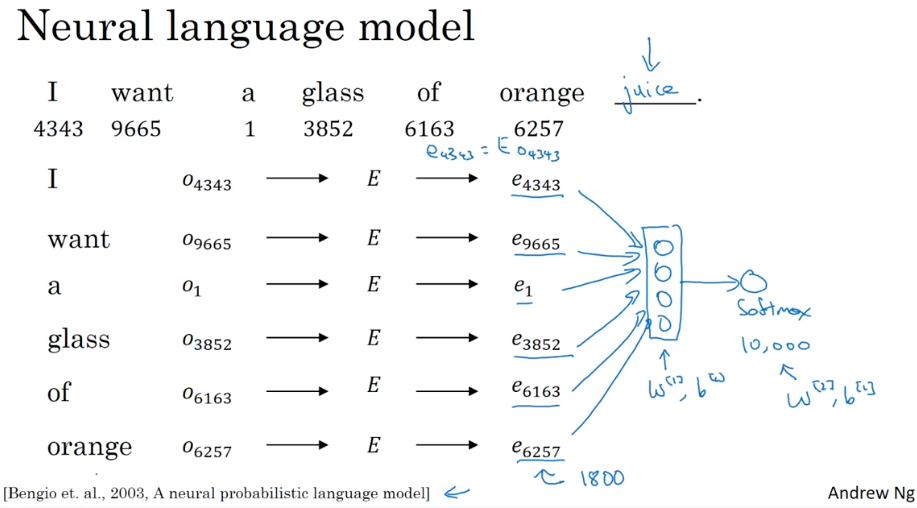

- What's more commonly used is to define a fixed **historical window**, e.g. only using the previous 4 words to predict the next word.
- The parameters of this language model are $E, W^{[l]}, b^{[l]}$, which will be learned through gradient descent.

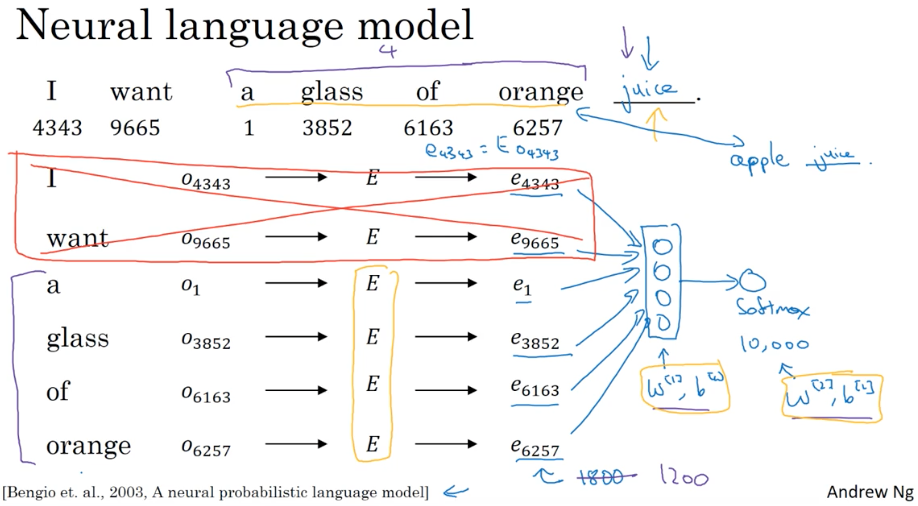

## Word2Vec
- **Word2Vec Skip Gram Model**
    - In the skip gram model, we randomly sample a **context** word from a sentence and then randomly sample a **target** word within $+/- n$ words away from the context.
    - We use the context as input and the target as output to train a supervised learning NN as below.
    - The goal is to optimize the parameters $E, \theta_{t}$.
    
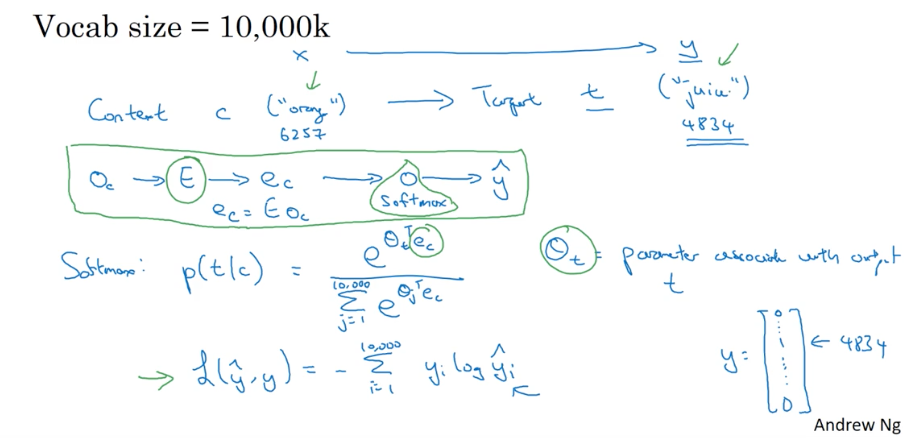

- The disadvantages of the skip gram model includes that it's computationally expensive, as we need to sum over all vocabularies in the dictionary to generate the softmax prediction.
    - One solution is to use the **hierarchical softmax** activation function instead.
- Also note that we usually don't sample context words uniformly, because if the training set is dominated by frequent words like "the", "at", and "a", we'll be spending most of our time updating $e_{c}$ corresponding to these common words only.

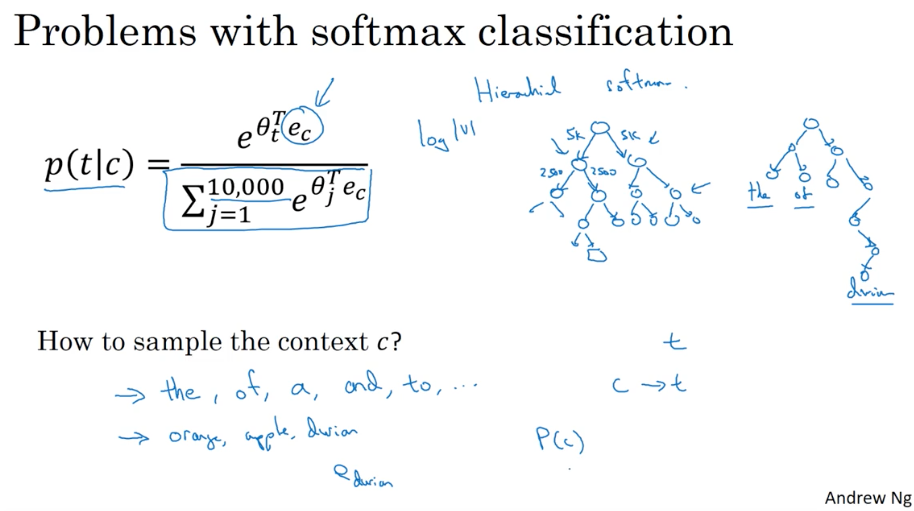

## Negative Sampling
- Using the negative sampling model, we define the supervised learning problem as a **binary classification** problem instead of softmax classification.
- We train the model with a $k+1$ size training set in each iteration, where there is $1$ positive example and $k$ randomly generated negative example.

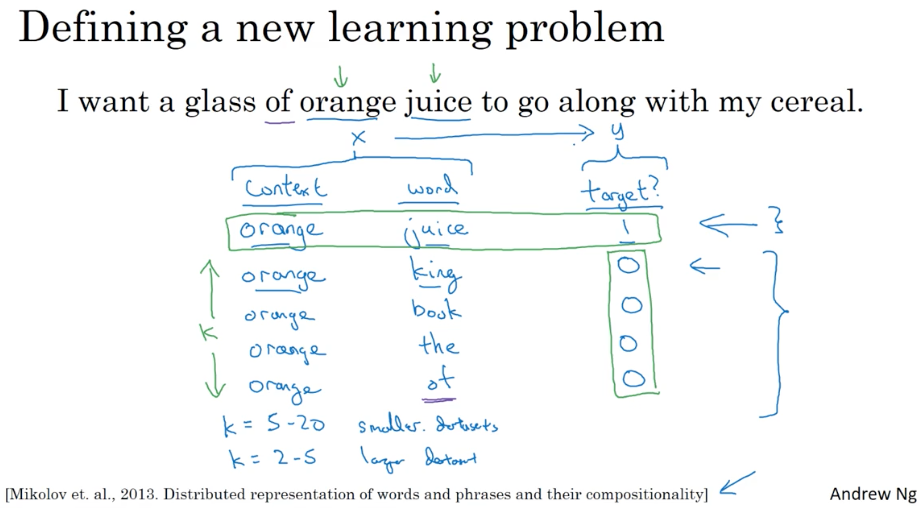

- We use **logistic regression** for binary classification.
    - While we need to sum over all words in the vocabulary for softmax classification, here using the negative sample model, we only need to generate $k+1$ binary classifications for each iteration.
    
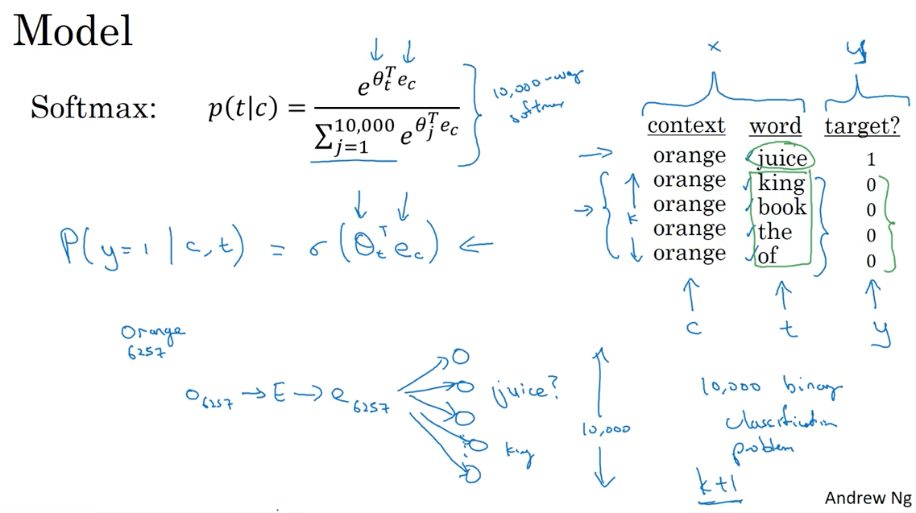

- How to sample negative examples?
    - To randomly sample the $k$ negative examples, we can either sample from empirical frequencies $f(w_{i})$ or sample uniformly for all words.
    - Researchers have proposed a more balanced strategy in between: $P(w_{i}) = \frac{f(w_{i})^{3/4}}{\sum_{j=1}^{N_{vocabulray}} f(w_{j})^{3/4}}$

## GloVe Word Vectors
- Define $X_{ij} = \text{# times word j appears in the context of i}$ 
    - $i$ is equivalent to $c$ from previous, and $j$ is equivalent to $t$.
- The goal of the model is to minimize the cost function $\sum_{i=1}^{N_{vocabulary}} \sum_{j=1}^{N_{vocabulary}} f(X_{ij})(\theta^{T}_{i}e_{j} + b_{i} + b_{j}' - log(X_{ij}))^{2}$

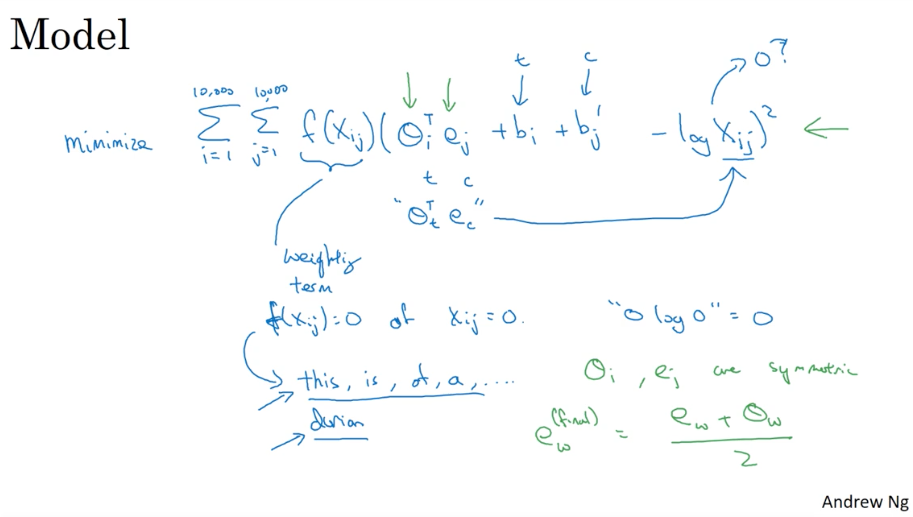

- Another note is that when using algorithms like GloVe, it's NOT guaranteed that each component in of the featurized representation of word $e_{w}$ is interpretable to human.
    - e.g. The model might generate the first component of $e_{w}$ as a combination of "Gender" and "Royal".

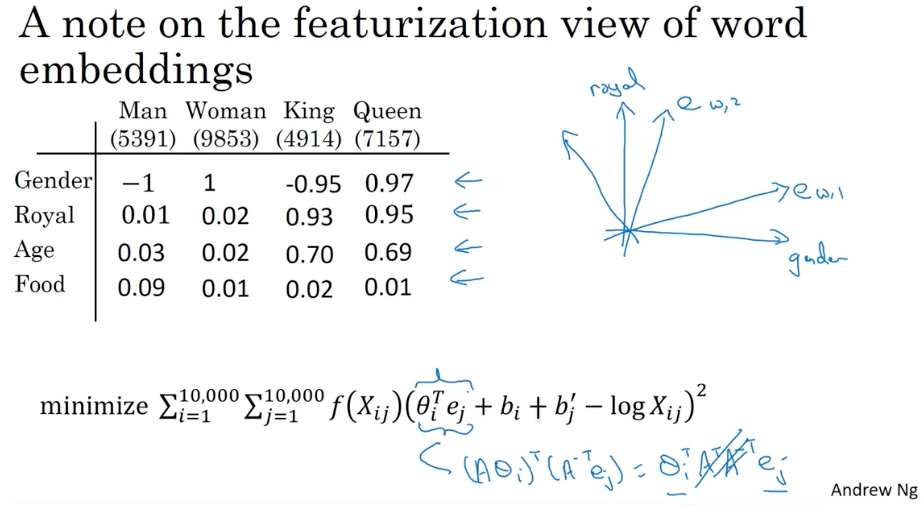

# Applications using Word Embeddings

## Sentiment Classification
- Simple Sentiment Classification Model
    - In this simple model below, we embed each word in a product review, take the average of all the featurized vectors, and feed this average vector into a softmax classifier to predict 1-5 stars.
    - However, this method of taking average might be way off if we have many positive words (e.g. "good") in the sentence while the entire sentence is a negation.
    
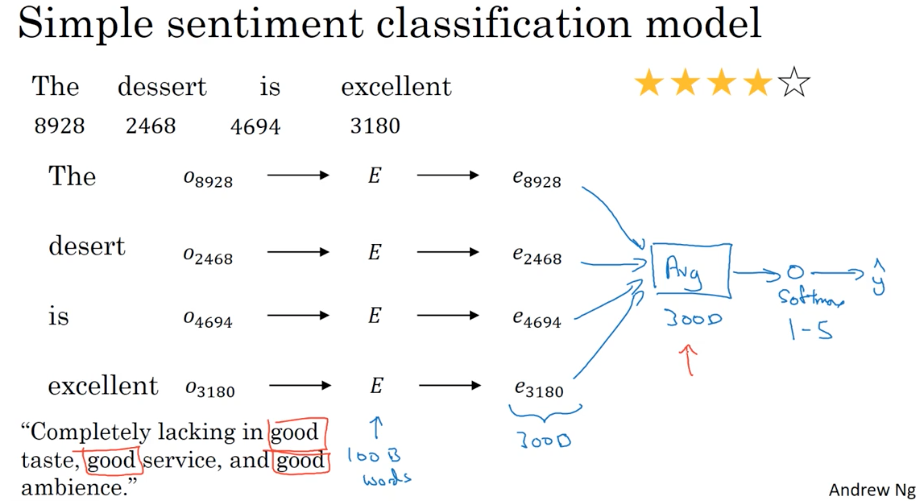

- A more complicated but appropriate model might be an RNN for sentiment classfication.
    - In an RNN, the negation word "lacking" will have more influence to the final prediction than it does in the simple mode based on averaging.
    - It can also generalize better if you have a different sentence in the test set that has a similar negation structure.
    
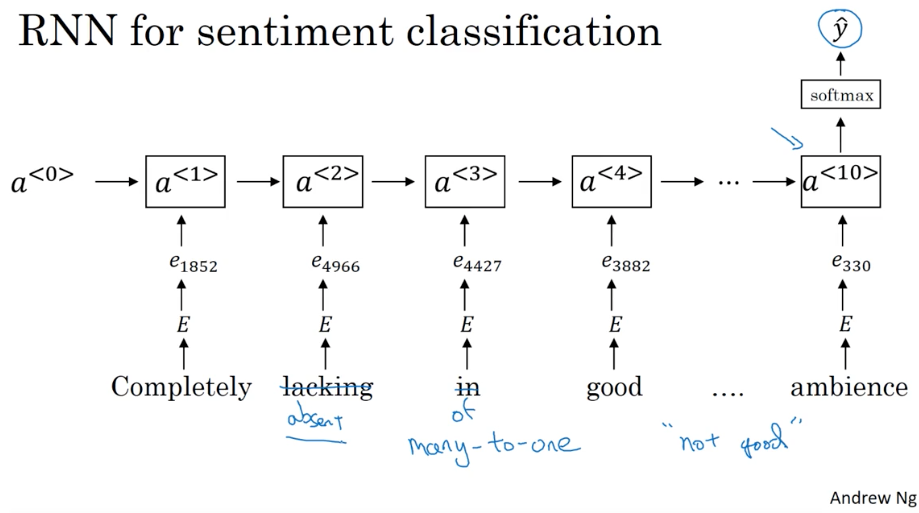

## Debiasing Word Embeddings
- Word embeddings can reflect gender, ethinicity, age, sexual orientation, and other biases of the text used to train the model.

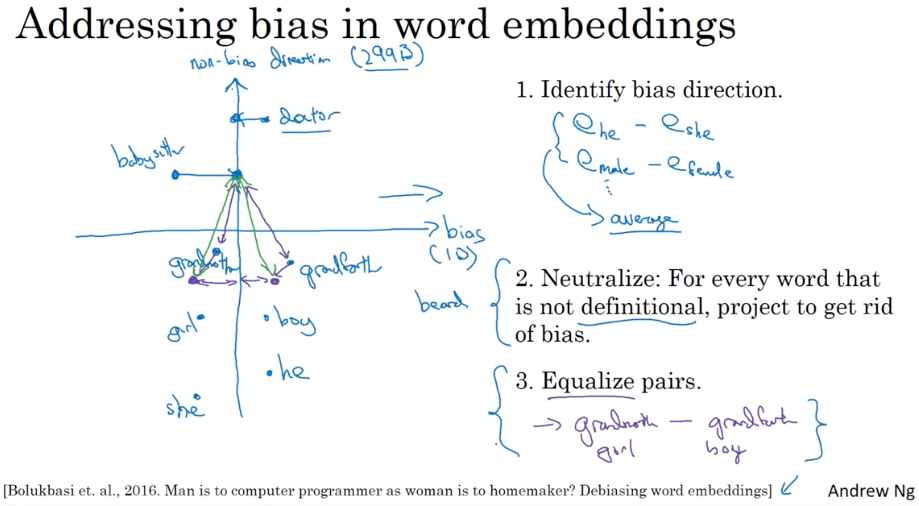